# Probabilistic Programming 2: Message Passing & Analytical Solutions

#### Goal 
  - Understand when and how analytical solutions to Bayesian inference can be obtained.
  - Understand how to perform message passing in a Forney-style factor graph.

#### Materials        
  - Mandatory
    - This notebook
    - Lecture notes on factor graphs
    - Lecture notes on continuous data
    - Lecture notes on discrete data
  - Optional
    - Chapters 2 and 3 of [Model-Based Machine Learning](http://www.mbmlbook.com/LearningSkills.html).
    - [Differences between Julia and Matlab / Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/index.html).

Note that none of the material below is new. The point of the Probabilistic Programming sessions is to solve practical problems so that the concepts from Bert's lectures become less abstract.

<span style="color:red"> Bert: Magnus precedes code in my lectures with some script that sets up the environment. You may want to do teh same: 
    
<code>using Pkg;Pkg.activate("probprog/workspace/");Pkg.instantiate();
IJulia.clear_output();</code>
</span>

In [2]:
using LinearAlgebra
using SpecialFunctions
using ForneyLab
using Plots
using PyCall
pyplot();

We'll be using the toolbox [ForneyLab.jl](https://github.com/biaslab/ForneyLab.jl) to visualize factor graphs and compute messages passed within the graph.

## Problem: A Job Interview

After you finish your master's degree, you will need to start looking for jobs. You will get one or more job interviews and some will be fun while others will be frustrating. The company you applied at wants a talented and skilled employee, but measuring a person's skill is tricky. Even a highly-skilled person makes mistakes and people with few skills can get lucky. In this session, we will look at various ways to assess skills using questions and test assignments. Along the way, you will gain experience with message passing, factor graphs and working with discrete vs continuous data.

### 1: Right or wrong

Suppose you head to a job interview for a machine learning engineer position. The company is interested in someone who knows Julia and has set up a test with syntax questions. We will first look at a single question, which we treat as an outcome variable $X_1$. You can either get this question right or wrong, which means we're dealing with a Bernoulli likelihood. The company assumes you have a skill level, denoted $\theta$, and the higher the skill, the more likely you are to get the question right. Since the company doesn't know anything about you, they chose an uninformative prior distribution: the Beta(1,1). We can write the generative model for answering this question as follows:

$$\begin{align}
p(X_1, \theta) = p(X_1 \mid \theta) \cdot p(\theta)
\end{align}$$

where $p(X_1 \mid \theta) = \text{Bernoulli}(X_1 \mid \theta)$ and $p(\theta) = \text{Beta}(\theta \mid 1,1)$. We can write this as the following factor graph.

todo: image factor graph

Fortunately, you don't have to do this by hand everytime. We can map this model to a Forney-style factor graph using the toolbox ForneyLab.

In [4]:
# Start building a model by setting up a FactorGraph structure
factor_graph1 = FactorGraph()

# Add the prior over 
@RV Œ∏ ~ Beta(1.0, 1.0, id=:prior)

# Add the question correctness likelihood
@RV X1 ~ Bernoulli(Œ∏, id=:likelihood)

# The outcome X1 is going to be observed, so we set up a placeholder for the data entry
placeholder(X1, :X1)

# Visualize the graph
ForneyLab.draw(factor_graph1)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11390882401810084644 -->
 
 11390882401810084644 
 
 placeholder_X1 
 
<!-- 1916220706028815956 -->
 
 1916220706028815956 
 
 Ber 
 likelihood 
 
<!-- 11390882401810084644--1916220706028815956 -->
 
 11390882401810084644--1916220706028815956 
 
 X1 
 1 out 
 1 out 
 
<!-- 2424748334631903142 -->
 
 2424748334631903142 
 
 clamp_1 
 
<!-- 2020485190470138822 -->
 
 2020485190470138822 
 
 Beta 
 prior 
 
<!-- 1916220706028815956--2020485190470138822 -->
 
 1916220706028815956--2020485190470138822 
 
 Œ∏ 
 1 out 
 2 p 
 
<!-- 2020485190470138822--2424748334631903142 -->
 
 2020485190470138822--2424748334631903142 
 
 clamp_1 
 1 out 
 2 a 
 
<!-- 683971283861339580 -->
 
 683971283861339580 
 
 clamp_2 
 
<!-- 2020485190470138822--683971283861339580 -->
 
 2020485190470138822--683971283861339580 
 
 clamp_2 
 1 out 
 3 b

Code notes:
- @RV is a macro that lets you Random Variables as nodes to your factor graph.
- The symbol ~ means "is distributed as". For example, $\theta \sim \text{Beta}(1,1)$ should be read as $\theta$ is distributed as a Beta(1,1) probability distribution.

Above you can see the factor graph that ForneyLab has generated. It is not as clean as the ones in the theory lectures, but the annotations are useful for debugging later on. We are now going to ask ForneyLab to generate a message passing procedure for us.

In [5]:
# Indicate which variables you want posteriors for
q = PosteriorFactorization(Œ∏, ids=[:Œ∏])

# Generate a message passing inference algorithm
algorithm = messagePassingAlgorithm(Œ∏, q)

# Compile algorithm code
source_code = algorithmSourceCode(algorithm)

# Bring compiled code into current scope
eval(Meta.parse(source_code))

# Visualize message passing schedule
pfŒ∏ = q.posterior_factors[:Œ∏]
ForneyLab.draw(pfŒ∏, schedule=pfŒ∏.schedule);

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 2020485190470138822 -->
 
 2020485190470138822 
 
 Beta 
 prior 
 
<!-- 2424748334631903142 -->
 
 2424748334631903142 
 
<!-- 2020485190470138822--2424748334631903142 -->
 
 2020485190470138822--2424748334631903142 
 
 1 out 
 2 a 
 
<!-- 683971283861339580 -->
 
 683971283861339580 
 
<!-- 2020485190470138822--683971283861339580 -->
 
 2020485190470138822--683971283861339580 
 
 1 out 
 3 b 
 
<!-- 1916220706028815956 -->
 
 1916220706028815956 
 
 Ber 
 likelihood 
 
<!-- 1916220706028815956--2020485190470138822 -->
 
 1916220706028815956--2020485190470138822 
 
 Œ∏ 
 1 out 
 ((1)) 
 2 p 
 ((2)) 
 
<!-- 11390882401810084644 -->
 
 11390882401810084644 
 
<!-- 11390882401810084644--1916220706028815956 -->
 
 11390882401810084644--1916220706028815956 
 
 1 out 
 1 out

ForneyLab's visualization of the message passing procedure for a specific variable isolates that variable in the graph and shows where the incoming messages come from. In this case, we are interested in $\theta$ (your skill level), which receives message ((2)) from the likelihood node (the "Ber" node above $\theta$) and message ((1)) from the prior node (the "Beta" node below $\theta$). Let's inspect these messages.

In [6]:
# Initialize a message data structure
messages = Array{Message}(undef, 2)

# Initalize marginal distributions data structure
marginals = Dict(:Œ∏ => ProbabilityDistribution(Univariate, Beta, a=1.0, b=1.0))

# Suppose you got question 1 correct
data = Dict(:X1 => 1)

# Update coefficients
stepŒ∏!(data, marginals, messages);

# Print messages
print("\nMessage ((1)) = "*string(messages[1].dist))
println("Message ((2)) = "*string(messages[2].dist))


Message ((1)) = Beta(a=1.00, b=1.00)
Message ((2)) = Beta(a=2.00, b=1.00)



Alright. So, they are both Beta distributions. Do they actually make sense? Where do these parameters come from?

Recall from the lecture notes that the formula for messages sent by factor nodes is:

$$ \boxed{
\underbrace{\overrightarrow{\mu}_{Y}(y)}_{\substack{ \text{outgoing}\\ \text{message}}} = \sum_{x_1,\ldots,x_n} \underbrace{\overrightarrow{\mu}_{X_1}(x_1)\cdots \overrightarrow{\mu}_{X_n}(x_n)}_{\substack{\text{incoming} \\ \text{messages}}} \cdot \underbrace{f(y,x_1,\ldots,x_n)}_{\substack{\text{node}\\ \text{function}}} }
$$

<p style="text-align:center;"><img src="../figures/ffg-sum-product.png" width="500px"></p>

The prior node is not connected to any other unknown variables and so does not receive incoming messages. Its outgoing message is therefore:

$$\begin{align}
\overrightarrow{\mu}(\theta) =&\ f(\theta) \\
=&\ \text{Beta}(\theta \mid 1,1) \, .
\end{align}$$

So that confirms the correctness of Message ((1)).

Similarly, we can also derive the message from the likelihood node by hand. For this, we need to know that the message coming from the observation $\overleftarrow{\mu}(x)$ is a Dirac delta spike, which, if you gave the right answer, has the form $\delta(X_1 - 1)$. The "node function" is the Bernoulli likelihood $\text{Bernoulli}(X_1 \mid \theta)$. Another thing to note is that this is essentially a convolution with respect to a delta function and that its [sifting property](https://en.wikipedia.org/wiki/Dirac_delta_function#Translation) holds: $\int_{X_1} \delta(X_1 - \hat{x}) \ f(X_1, \theta) \mathrm{d}X_1 = f(\hat{x}, \theta)$. The fact that $X_1$ is a discrete variable instead of a continuous one, does not negate this. <span style="color:red"> Bert: You may want to check if you mean a Kronecker delta instead of a Dirac delta.</span> Using these facts, we can perform the message computation by hand:

$$\begin{align}
\overleftarrow{\mu}(\theta) =&\ \sum_{X_1} \overleftarrow{\mu}(X_1) \ f(X_1, \theta) \\
=&\ \sum_{X_1} \delta(X_1 - 1) \ \text{Bernoulli}(X_1 \mid \theta) \\
=&\ \sum_{X_1} \delta(X_1 - 1) \ \theta^{X_1} (1 - \theta)^{1-X_1} \\
=&\ \theta^{1} (1 - \theta)^{1-1} \, .
\end{align}$$

Remember that the pdf of a Beta distribution is proportional to $\theta^{\alpha-1} (1 - \theta)^{\beta-1}$. So, if you read the second-to-last line above as $\theta^{2-1} (1 - \theta)^{1-1}$, then the outgoing message $\overleftarrow{\mu}(\theta)$ is proportional to a Beta distribution with $\alpha=2$ and $\beta=1$. So, our manual derivation verifies ForneyLab's Message ((2)).

Let's now look at these messages visually.

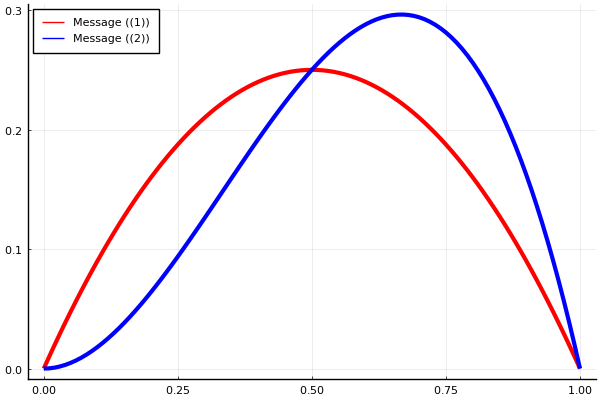

In [7]:
# Probability density function of a Beta distribution
Beta(Œ∏, Œ±, Œ≤) = 1/beta(Œ±,Œ≤) * Œ∏^Œ± * (1-Œ∏)^Œ≤

# Extract parameters from message ((1))
Œ±1 = messages[1].dist.params[:a]
Œ≤1 = messages[1].dist.params[:b]

# Extract parameters from message ((2))
Œ±2 = messages[2].dist.params[:a]
Œ≤2 = messages[2].dist.params[:b]

# Plot messages
Œ∏_range = range(0, step=0.01, stop=1.0)
plot(Œ∏_range, Beta.(Œ∏_range, Œ±1, Œ≤1), color="red", linewidth=3, label="Message ((1))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±2, Œ≤2), color="blue", linewidth=3, label="Message ((2))")

<span style="color:red">You said we started with an uninformative prior Beta(1,1). The red one does not look uninformative. Can you explain the shape of Beta(1,1) (has to do with the finite domain [0,1].) </span>

The marginal distribution for $\theta$, representing the posterior $p(\theta \mid X_1)$, is obtained by taking the product (followed by normalization) of the two messages: $\overrightarrow{\mu}(\theta) \cdot \overleftarrow{\mu}(\theta)$. Multiplying two Beta distributions produces another Beta distribution with parameter:

$$\begin{align}
\alpha \leftarrow&\ \alpha_1 + \alpha_2 - 1 \\
\beta \leftarrow&\ \beta_1 + \beta_2 - 1 \, ,
\end{align}$$

In our case, the new parameters would be $\alpha = 1 + 2 - 1 = 2$ and $\beta = 1 + 1 - 1 = 1$. Let's check with ForneyLab what it computed.

In [8]:
marginals[:Œ∏]

Beta(a=2.00, b=1.00)


Again, ForneyLab matches our manual derivations. Let's visualize the messages as well as the marginal.

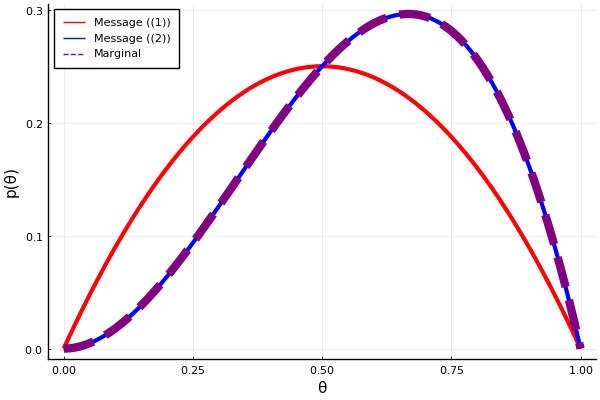

In [9]:
# Extract marginal's parameters
Œ±_marg = marginals[:Œ∏].params[:a]
Œ≤_marg = marginals[:Œ∏].params[:b]

# Plot messages
Œ∏_range = range(0, step=0.01, stop=1.0)
plot(Œ∏_range, Beta.(Œ∏_range, Œ±1, Œ≤1), color="red", linewidth=3, label="Message ((1))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±2, Œ≤2), color="blue", linewidth=3, label="Message ((2))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±_marg, Œ≤_marg), color="purple", linewidth=6, linestyle=:dash, label="Marginal")
xlabel!("Œ∏")
ylabel!("p(Œ∏)")

The pdf of the marginal distribution lies on top of the pdf of Message ((2)). That's not always going to be the case; the Beta(1,1) distribution is special in that when you multiply Beta(1,1) with a general Beta(a,b) the result will always be Beta(a,b), kinda like multiplying by $1$. We call prior distributions that have this special effect "non-informative priors".

#### Multiple questions

Of course, you won't be evaluated on just a single question: it's still possible for you to get one question wrong even if you have a high skill level. You would consider it unfair to be rejected based on only one question. So, we are going to add another question. We're also going to change the prior: the company now assumes that you must have _some_ skill if you applied for the position. This is reflected in a prior Beta distributions with $\alpha = 3.0$ and $\beta = 2.0$. For now, the second question is also a right-or-wrong question. The outcome of this new question is denoted with variable $X_2$. The generative model is 

$$p(X_1, X_2, \theta) = p(X_1 \mid \theta) p(X_2 \mid \theta) p(\theta)$$ 

with the accompanying factor graph:

In [10]:
# Start building a model
factor_graph2 = FactorGraph()

# Add the prior
@RV Œ∏ ~ Beta(3.0, 2.0, id=:prior)

# Add question 1 correctness likelihood
@RV X1 ~ Bernoulli(Œ∏, id=:likelihood1)

# Add question 2 correctness likelihood
@RV X2 ~ Bernoulli(Œ∏, id=:likelihood2)

# The question outcomes are going to be observed
placeholder(X1, :X1)
placeholder(X2, :X2)

# Visualize the graph
ForneyLab.draw(factor_graph2)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 14297076220700793627 -->
 
 14297076220700793627 
 
 placeholder_X2 
 
<!-- 11781308476082037849 -->
 
 11781308476082037849 
 
 Ber 
 likelihood2 
 
<!-- 14297076220700793627--11781308476082037849 -->
 
 14297076220700793627--11781308476082037849 
 
 X2 
 1 out 
 1 out 
 
<!-- 16420762409385296539 -->
 
 16420762409385296539 
 
 clamp_2 
 
<!-- 8728560067725509884 -->
 
 8728560067725509884 
 
 = 
 equ_Œ∏_1 
 
<!-- 8728560067725509884--11781308476082037849 -->
 
 8728560067725509884--11781308476082037849 
 
 Œ∏ 
 2 p 
 3 3 
 
<!-- 14833843516904000393 -->
 
 14833843516904000393 
 
 Beta 
 prior 
 
<!-- 8728560067725509884--14833843516904000393 -->
 
 8728560067725509884--14833843516904000393 
 
 Œ∏ 
 1 out 
 1 1 
 
<!-- 12631590062669719763 -->
 
 12631590062669719763 
 
 Ber 
 likelihood1 
 
<!-- 8728560067725509884--12631590062669719763 -->
 
 8728560067725509884--12631590062669719763 
 
 Œ∏ 
 2 p 
 2 2 
 
<!-- 4963145003971670503 -->
 
 4963145003971670503 
 
 placeholder_X1 
 
<!-- 4963145003971670503--12631590062669719763 -->
 
 4963145003971670503--12631590062669719763 
 
 X1 
 1 out 
 1 out 
 
<!-- 14833843516904000393--16420762409385296539 -->
 
 14833843516904000393--16420762409385296539 
 
 clamp_2 
 1 out 
 3 b 
 
<!-- 8319308323373658302 -->
 
 8319308323373658302 
 
 clamp_1 
 
<!-- 14833843516904000393--8319308323373658302 -->
 
 14833843516904000393--8319308323373658302 
 
 clamp_1 
 1 out 
 2 a

Notice that ForneyLab has generated an equality node. So, even though the model has mathematically not become much more complex (again, you've seen this in the Beer Tasting Experiment), the factor graph has. We will go through the message passing operations below. First, we generate an algorithm and visualize where all the messages for $\theta$ come from.

In [11]:
# Indicate which variables you want posteriors for
q = PosteriorFactorization(Œ∏, ids=[:Œ∏])

# Generate a message passing inference algorithm
algorithm = messagePassingAlgorithm(Œ∏, q)

# Compile algorithm code
source_code = algorithmSourceCode(algorithm)

# Bring compiled code into current scope
eval(Meta.parse(source_code))

# Visualize message passing schedule
pfŒ∏ = q.posterior_factors[:Œ∏]
ForneyLab.draw(pfŒ∏, schedule=pfŒ∏.schedule);

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11781308476082037849 -->
 
 11781308476082037849 
 
 Ber 
 likelihood2 
 
<!-- 8728560067725509884 -->
 
 8728560067725509884 
 
 = 
 equ_Œ∏_1 
 
<!-- 8728560067725509884--11781308476082037849 -->
 
 8728560067725509884--11781308476082037849 
 
 Œ∏ 
 2 p 
 ((3)) 
 3 3 
 
<!-- 14833843516904000393 -->
 
 14833843516904000393 
 
 Beta 
 prior 
 
<!-- 8728560067725509884--14833843516904000393 -->
 
 8728560067725509884--14833843516904000393 
 
 Œ∏ 
 1 out 
 ((1)) 
 1 1 
 (4) 
 
<!-- 12631590062669719763 -->
 
 12631590062669719763 
 
 Ber 
 likelihood1 
 
<!-- 8728560067725509884--12631590062669719763 -->
 
 8728560067725509884--12631590062669719763 
 
 Œ∏ 
 2 p 
 ((2)) 
 2 2 
 
<!-- 16420762409385296539 -->
 
 16420762409385296539 
 
<!-- 14833843516904000393--16420762409385296539 -->
 
 14833843516904000393--16420762409385296539 
 
 1 out 
 3 b 
 
<!-- 8319308323373658302 -->
 
 8319308323373658302 
 
<!-- 14833843516904000393--8319308323373658302 -->
 
 14833843516904000393--8319308323373658302 
 
 1 out 
 2 a 
 
<!-- 14297076220700793627 -->
 
 14297076220700793627 
 
<!-- 14297076220700793627--11781308476082037849 -->
 
 14297076220700793627--11781308476082037849 
 
 1 out 
 1 out 
 
<!-- 4963145003971670503 -->
 
 4963145003971670503 
 
<!-- 4963145003971670503--12631590062669719763 -->
 
 4963145003971670503--12631590062669719763 
 
 1 out 
 1 out

There are 4 messages, one from the prior ((1)), one from the first likelihood ((2)), one from the second likelihood ((3)) and one from the equality node ((4)). ForneyLab essentially combines messages 2 and 3 into message 4 and then multiplies messages 1 and 4 to produce the marginal. We can see this if we look in the source code:

In [12]:
println(source_code)

begin

function stepŒ∏!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVBBetaOut(nothing, ProbabilityDistribution(Univariate, PointMass, m=3.0), ProbabilityDistribution(Univariate, PointMass, m=2.0))
messages[2] = ruleVBBernoulliIn1(ProbabilityDistribution(Univariate, PointMass, m=data[:X1]), nothing)
messages[3] = ruleVBBernoulliIn1(ProbabilityDistribution(Univariate, PointMass, m=data[:X2]), nothing)
messages[4] = ruleSPEqualityBeta(nothing, messages[2], messages[3])

marginals[:Œ∏] = messages[1].dist * messages[4].dist

return marginals

end

end # block


You can see that `messages[4]` is a function of `messages[2]` and `messages[3]` and that `marginals[:Œ∏]` is the product of `messages[1]` and `messages[4]`. Let's execute the message passing procedure and take a look at the functional form of the messages.

<span style="color:red"> insert in text: Suppose you got question 1 right and question 2 wrong. (not jsut in code)</span>

In [13]:
# Initialize a message data structure
messages = Array{Message}(undef, 4)

# Initalize marginal distributions data structure
marginals = Dict(:Œ∏ => ProbabilityDistribution(Univariate, Beta, a=1.0, b=1.0))

# Suppose you got question 1 right and question 2 wrong
data = Dict(:X1 => 1,
            :X2 => 0)

# Update coefficients
stepŒ∏!(data, marginals, messages);

# Print messages
print("\nMessage ((1)) = "*string(messages[1].dist))
print("Message ((2)) = "*string(messages[2].dist))
print("Message ((3)) = "*string(messages[3].dist))
println("Message ((4)) = "*string(messages[4].dist))


Message ((1)) = Beta(a=3.00, b=2.00)
Message ((2)) = Beta(a=2.00, b=1.00)
Message ((3)) = Beta(a=1.00, b=2.00)
Message ((4)) = Beta(a=2.00, b=2.00)



Messages ((1)) and ((2)) are clear, but Message ((3)) and Message ((4)) are new. 

---

### **Assignment**

**Message ((3))'s derivation is similar to that of Message ((2)), but with an incorrect answer given to question 2. Derive the form of the message.** <span style="color:red"> this sentence a bit hard to parse. can you rephrase?</span>

---

<span style="color:red">Also: should assignments be submitted, or do you provide an answer? how can they test if they did it right?</span>

Message ((4)) is the result of the standard message computation formula for the case of an equality node:

$$\begin{align}
\downarrow \mu(\theta) =&\ \sum_{\theta',\ \theta''} \overrightarrow{\mu}(\theta'')\ f_{=}(\theta, \theta', \theta'') \ \overleftarrow{\mu}(\theta') \\
 =&\ \overrightarrow{\mu}(\theta) \cdot \overleftarrow{\mu}(\theta) \\
=&\ \text{Beta}(\theta \mid 2, 1) \cdot \text{Beta}(\theta \mid 1, 2) \\
 =&\ \text{Beta}(\theta \mid 2, 2) \quad .
\end{align}$$

Let's visualize the messages and the marginal again.

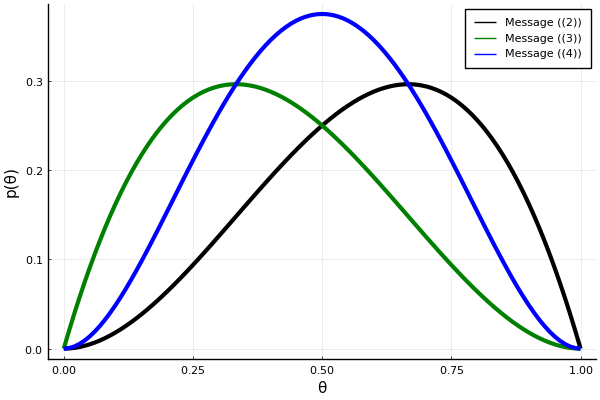

In [14]:
# Extract parameters from message ((2))
Œ±2 = messages[2].dist.params[:a]
Œ≤2 = messages[2].dist.params[:b]

# Extract parameters from message ((3))
Œ±3 = messages[3].dist.params[:a]
Œ≤3 = messages[3].dist.params[:b]

# Extract parameters from message ((4))
Œ±4 = messages[4].dist.params[:a]
Œ≤4 = messages[4].dist.params[:b]

plot(Œ∏_range, Beta.(Œ∏_range, Œ±2, Œ≤2), color="black", linewidth=3, label="Message ((2))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±3, Œ≤3), color="green", linewidth=3, label="Message ((3))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±4, Œ≤4), color="blue", linewidth=3, label="Message ((4))")
xlabel!("Œ∏")
ylabel!("p(Œ∏)")

Message ((2)) and Message ((3)) are direct oppossites: ((2)) increases the estimate and ((3)) decreases the estimate of your skill level.  Message ((4)) is therefore centered on $0.5$. The data essentially says that you are guessing at random. <span style="color:red">Well, the data says more. It makes a difference if you get one right and wrong answer, vs 500 answers both right and wrong. The variance has been affected</span>

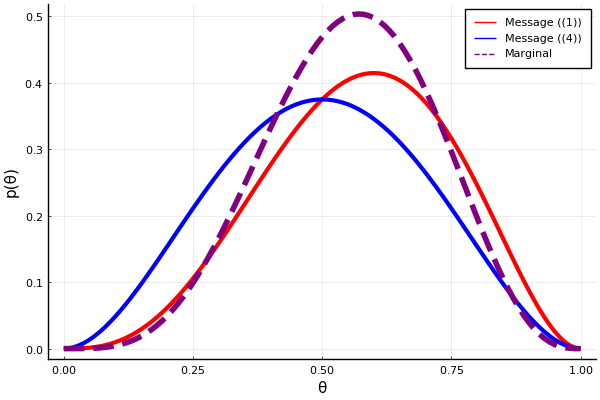

In [15]:
# Extract parameters from message ((1))
Œ±1 = messages[1].dist.params[:a]
Œ≤1 = messages[1].dist.params[:b]

# Extract parameters from message ((4))
Œ±4 = messages[4].dist.params[:a]
Œ≤4 = messages[4].dist.params[:b]

# Extract parameters
Œ±_marg = marginals[:Œ∏].params[:a]
Œ≤_marg = marginals[:Œ∏].params[:b]

plot(Œ∏_range, Beta.(Œ∏_range, Œ±1, Œ≤1), color="red", linewidth=3, label="Message ((1))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±4, Œ≤4), color="blue", linewidth=3, label="Message ((4))")
plot!(Œ∏_range, Beta.(Œ∏_range, Œ±_marg, Œ≤_marg), color="purple", linewidth=4, linestyle=:dash, label="Marginal")
xlabel!("Œ∏")
ylabel!("p(Œ∏)")

If we now combine the prior (Message ((1)) in red above) with the combined message from both likelihood terms (Message ((4)) in blue), we get the new marginal (purple dotted line). The mean of the marginal lies above $0.5$, which is due to the prior assumption that you must have _some_ skill if you applied. 

---

### **Assignment**

**Suppose you were asked 4 questions and you gave correct, incorrect, correct and correct answers. Construct the factor graph with 4 likelihood nodes, perform message passing and compute the marginal distribution. What are its parameters?** 

(Tip: don't forget to add the outcomes to the `data` dictionary).

---

### 2. Score questions

So far, the models we have been looking at have been quite simple; they are Beta-Bernoulli combinations which is exactly what we did for the Beer Tasting Experiment. We will now move on to more complicated distributions. These will enrich your toolbox and allow you to do much more.

Suppose you are not tested on a right-or-wrong question, but on a score question. For instance, you have to complete a piece of code for which you get a score. If all of it was wrong you get a score of $0$, if some of it was correct you get a score of $1$ and if all of it was correct you get a score $2$. That means we have a likelihood with three outcomes: $X_1 = \{ 0,1,2\}$. Suppose we once again ask two questions, $X_1$ and $X_2$. The order in which we ask these questions does not matter, so that means we choose Categorical distributions for these likelihood functions: $X_1, X_2 \sim \text{Categorical}(\theta)$. The parameter $\theta$ is no longer a single parameter, indicating the probability of getting the question right, but a vector of three parameters: $\theta = (\theta_1, \theta_2, \theta_3)$. Each $\theta_k$ indicates the probability of getting the $k$-th outcome. In other words, $\theta_1$ indicates the probability of getting $0$ points, $\theta_2$ of getting $1$ point and $\theta_3$ of getting two points. A highly-skilled applicant will have a parameter vector of $(0.05, 0.1, 0.85)$, for example. The prior distribution conjugate to the Categorical distribution is the Dirichlet distribution. 

Let's look at the generative model:

$$p(X_1, X_2, \theta) = p(X_1 \mid \theta) p(X_2 \mid \theta) p(\theta) \, .$$ 

It's the same as before. The only difference is that:

$$\begin{align}
p(X_1 \mid \theta) =&\ \text{Categorical}(X_1 \mid \theta) \\
p(X_2 \mid \theta) =&\ \text{Categorical}(X_2 \mid \theta) \\
p(\theta) =&\ \text{Dirichlet}(\theta)
\end{align}$$

The factor graph that we build is going to look very similar as well:

In [16]:
# Start building a model
factor_graph3 = FactorGraph()

# Add the prior
@RV Œ∏ ~ Dirichlet([1.0, 3.0, 2.0], id=:prior)

# Add question 1 correctness likelihood
@RV X1 ~ Categorical(Œ∏, id=:likelihood1)

# Add question 2 correctness likelihood
@RV X2 ~ Categorical(Œ∏, id=:likelihood2)

# The question outcomes are going to be observed
placeholder(X1, dims=(3,), :X1)
placeholder(X2, dims=(3,), :X2)

# Visualize the graph
ForneyLab.draw(factor_graph3)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 15493738896249785584 -->
 
 15493738896249785584 
 
 = 
 equ_Œ∏_1 
 
<!-- 17540006879901162703 -->
 
 17540006879901162703 
 
 Cat 
 likelihood2 
 
<!-- 15493738896249785584--17540006879901162703 -->
 
 15493738896249785584--17540006879901162703 
 
 Œ∏ 
 2 p 
 3 3 
 
<!-- 2788315091402973766 -->
 
 2788315091402973766 
 
 Cat 
 likelihood1 
 
<!-- 15493738896249785584--2788315091402973766 -->
 
 15493738896249785584--2788315091402973766 
 
 Œ∏ 
 2 p 
 2 2 
 
<!-- 7312273686223915572 -->
 
 7312273686223915572 
 
 Dir 
 prior 
 
<!-- 15493738896249785584--7312273686223915572 -->
 
 15493738896249785584--7312273686223915572 
 
 Œ∏ 
 1 out 
 1 1 
 
<!-- 15863657912870908918 -->
 
 15863657912870908918 
 
 clamp_1 
 
<!-- 13323287682836413383 -->
 
 13323287682836413383 
 
 placeholder_X1 
 
<!-- 13323287682836413383--2788315091402973766 -->
 
 13323287682836413383--2788315091402973766 
 
 X1 
 1 out 
 1 out 
 
<!-- 7382068460415131597 -->
 
 7382068460415131597 
 
 placeholder_X2 
 
<!-- 7382068460415131597--17540006879901162703 -->
 
 7382068460415131597--17540006879901162703 
 
 X2 
 1 out 
 1 out 
 
<!-- 7312273686223915572--15863657912870908918 -->
 
 7312273686223915572--15863657912870908918 
 
 clamp_1 
 1 out 
 2 a

The only difference with the previous graph is the fact that the node called "prior" is a 'Dir', short for Dirichlet, and that the two nodes called "likelihood1" and "likelihood2" are 'Cat' types, short for Categorical. Let's look at the message passing schedule:

In [17]:
# Indicate which variables you want posteriors for
q = PosteriorFactorization(Œ∏, ids=[:Œ∏])

# Generate a message passing inference algorithm
algorithm = messagePassingAlgorithm(Œ∏, q)

# Compile algorithm code
source_code = algorithmSourceCode(algorithm)

# Bring compiled code into current scope
eval(Meta.parse(source_code))

# Visualize message passing schedule
pfŒ∏ = q.posterior_factors[:Œ∏]
ForneyLab.draw(pfŒ∏, schedule=pfŒ∏.schedule);

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 15493738896249785584 -->
 
 15493738896249785584 
 
 = 
 equ_Œ∏_1 
 
<!-- 17540006879901162703 -->
 
 17540006879901162703 
 
 Cat 
 likelihood2 
 
<!-- 15493738896249785584--17540006879901162703 -->
 
 15493738896249785584--17540006879901162703 
 
 Œ∏ 
 2 p 
 ((3)) 
 3 3 
 
<!-- 2788315091402973766 -->
 
 2788315091402973766 
 
 Cat 
 likelihood1 
 
<!-- 15493738896249785584--2788315091402973766 -->
 
 15493738896249785584--2788315091402973766 
 
 Œ∏ 
 2 p 
 ((2)) 
 2 2 
 
<!-- 7312273686223915572 -->
 
 7312273686223915572 
 
 Dir 
 prior 
 
<!-- 15493738896249785584--7312273686223915572 -->
 
 15493738896249785584--7312273686223915572 
 
 Œ∏ 
 1 out 
 ((1)) 
 1 1 
 (4) 
 
<!-- 15863657912870908918 -->
 
 15863657912870908918 
 
<!-- 7312273686223915572--15863657912870908918 -->
 
 7312273686223915572--15863657912870908918 
 
 1 out 
 2 a 
 
<!-- 7382068460415131597 -->
 
 7382068460415131597 
 
<!-- 7382068460415131597--17540006879901162703 -->
 
 7382068460415131597--17540006879901162703 
 
 1 out 
 1 out 
 
<!-- 13323287682836413383 -->
 
 13323287682836413383 
 
<!-- 13323287682836413383--2788315091402973766 -->
 
 13323287682836413383--2788315091402973766 
 
 1 out 
 1 out

That's the same as before as well: 2 messages from the likelihoods, 1 combined likelihood message from the equality node and 1 message from the prior.

If we now setup the message passing procedure, we have to be a little bit more careful. We cannot feed the scores $\{ 0,1,2\}$ as outcomes directly. We have to encode them in one-hot vectors (see Bert's lecture notes on discrete distributions). Suppose you had a score of $1$ for the first question and a score of $2$ for the second one. That translates into a vector $[0, 1, 0]$ and $[0, 0, 1]$, respectively. These we enter into the `data` dictionary:

In [18]:
# Initialize a message data structure
messages = Array{Message}(undef, 4)

# Initalize marginal distributions data structure
marginals = Dict(:Œ∏ => ProbabilityDistribution(Dirichlet, a=[1.0, 1.0, 1.0]))

# Enter the observed outcomes in the placeholders
data = Dict(:X1 => [0, 1, 0],
            :X2 => [0, 0, 1])

# Update coefficients
stepŒ∏!(data, marginals, messages);

# Print messages
print("\nMessage ((1)) = "*string(messages[1].dist))
print("Message ((2)) = "*string(messages[2].dist))
print("Message ((3)) = "*string(messages[3].dist))
print("Message ((4)) = "*string(messages[4].dist))
println("Marginal of Œ∏ = "*string(marginals[:Œ∏]))


Message ((1)) = Dir(a=[1.00, 3.00, 2.00])
Message ((2)) = Dir(a=[1.00, 2.00, 1.00])
Message ((3)) = Dir(a=[1.00, 1.00, 2.00])
Message ((4)) = Dir(a=[1.00, 2.00, 2.00])
Marginal of Œ∏ = Dir(a=[1.00, 4.00, 3.00])



Visualizing a Dirichlet distribution is a bit tricky. In the special case of $3$ parameters, we can plot the probabilities on a simplex. As a reminder, a [simplex](https://en.wikipedia.org/wiki/Simplex) in 3-dimensions is the triangle between the coordinates $[0,0,1]$, $[0,1,0]$ and $[1,0,0]$:

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/2D-simplex.svg/150px-2D-simplex.svg.png" width="150px"></p>

Each $\theta$ is a point on that triangle. Since the triangle is a 2-dimensional plane, we can plot the Dirichlet's probability density over it.

<span style="color:red"> Uses PyCall below, I did not have that installed. Generally, hwo do you make use people are running the right packages and versions?</span>

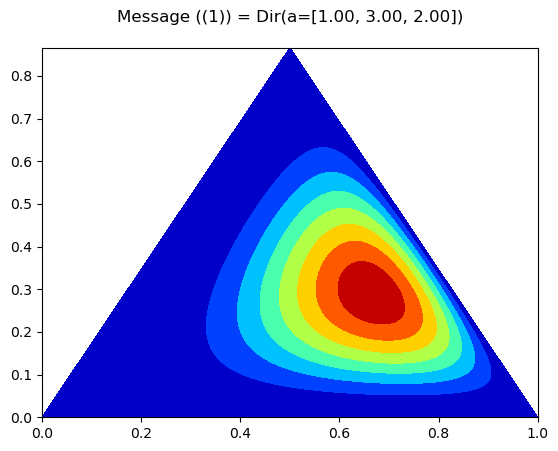

In [21]:
# Import matplotlib 
plt = pyimport("matplotlib.pyplot")

# Include helper function
include("../scripts/dirichlet_simplex.jl")

# Extract parameters of Message ((1))
Œ±1 = messages[1].dist.params[:a]

# Compute pdf contour lines on the simplex
trimesh, pvals = pdf_contours_simplex(Œ±1)

# Plot using matplotlib's tricontour
plt.tricontourf(trimesh, pvals, nlevels=200, cmap="jet");
plt.title("Message ((1)) = "*string(messages[1].dist));

The red spot is the area of high probability, with the contours around indicating increasing uncertainty. The prior, with concentration parameters $[1, 3, 2]$, reflects the belief that all applicants are least likely to get the question completely wrong ($\alpha_1$ = 1, score = 0), most likely to get part of the question right ($\alpha_2$ = 3, score = 1) and moderately likely to get the question completely correct ($\alpha_3$ = 2, score = 2).

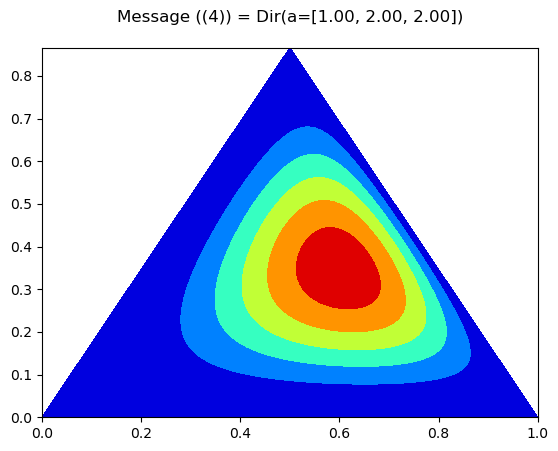

In [22]:
# Extract parameters 
Œ±4 = messages[4].dist.params[:a]

# Compute pdf contour lines on the simplex
trimesh, pvals = pdf_contours_simplex(Œ±4)

# Plot using matplotlib's tricontour
plt.tricontourf(trimesh, pvals, nlevels=200, cmap="jet")
plt.title("Message ((4)) = "*string(messages[4].dist));

Since we got scores $X_1 = 1$ and $X_2 = 2$, the combined message from both likelihoods has concentration parameters $[1,2,2]$. 

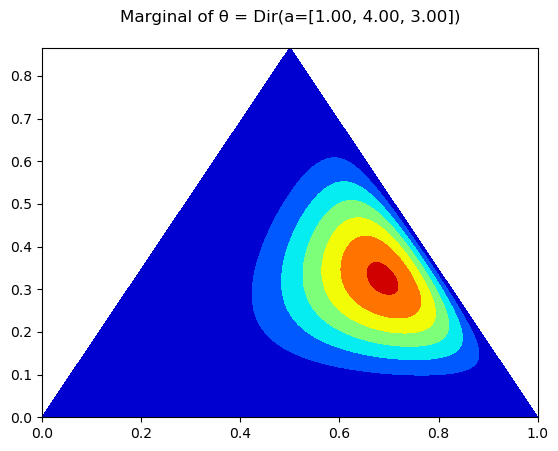

In [23]:
# Extract parameters 
Œ±_marg = marginals[:Œ∏].params[:a]

# Compute pdf contour lines on the simplex
trimesh, pvals = pdf_contours_simplex(Œ±_marg)

# Plot using matplotlib's tricontour
plt.tricontourf(trimesh, pvals, nlevels=200, cmap="jet")
plt.title("Marginal of Œ∏ = "*string(marginals[:Œ∏]));

The marginal is clearly the combination of Messages ((1)) and ((4)), resulting in concentration parameters $[1,4,3]$. Note that is already much more focused in one particular area of the simplex.

---

### **Assignment**

**Suppose that, instead of scores $\{ 0,1,2\}$, you could get scores $\{ 0,1,2,3,4\}$ for each question. Say you got a score of $2$ for the first question and $4$ for the second one. Construct the corresponding factor graph, perform message passing and compute the marginal distribution. What are its parameters?** 

(Tip: don't forget to map the scores to one-hot vectors).

---

### 3. Rating scale

You might want to evaluate someone by an even finer metric. For example, in oral exams you need to provide a score based on a conversation which is hard to quantify. You could do this by taking away the discrete set of responses and replacing it with a continuous response variable. For example, rating scales are forms of continuous response models. You would mark the applicant's performance on a question as a cross on a line:

<p style="text-align:center;"><img src="https://images.slideplayer.com/15/4506022/slides/slide_19.jpg" width="400px"></p>

It is still the case that there is some underlying level of skill, that we'll call $\theta$, and that the performance on each question is a noisy measurement of that skill, that we'll call $X$. We argue that performance noise is symmetric: the probability of performing a little better than their skill level is equal to performing a little worse. We will therefore use Gaussian, or Normal, likelihood functions: $p(X \mid \theta) = \text{Normal}(X \mid \theta, \sigma^2)$. The performance noise level will be fixed at $\sigma^2 = 5$, for now. The conjugate prior to the mean in Gaussian likelihoods is another Gaussian distribution: $p(\theta) = \text{Normal}(\theta \mid 50, 20)$. Say that we rate performance on a scale from $0$ to $100$, then it makes sense to use a mean of $60$ and a variance of $20$ for the prior.

We'll keep the same generative model as before, with new definitions for each distribution:

$$\begin{align}
p(X_1 \mid \theta) =&\ \text{Normal}(X_1 \mid \theta, 5) \\
p(X_2 \mid \theta) =&\ \text{Normal}(X_2 \mid \theta, 5) \\
p(\theta) =&\ \text{Normal}(\theta \mid 50, 20)
\end{align}$$

The factor graph will again be similar, but with different types of nodes:

In [24]:
# Start building a model
factor_graph4 = FactorGraph()

# Add the prior
@RV Œ∏ ~ GaussianMeanVariance(60, 20, id=:prior)

# Add question 1 correctness likelihood
@RV X1 ~ GaussianMeanVariance(Œ∏, 10, id=:likelihood1)

# Add question 2 correctness likelihood
@RV X2 ~ GaussianMeanVariance(Œ∏, 10, id=:likelihood2)

# The question outcomes are going to be observed
placeholder(X1, :X1)
placeholder(X2, :X2)

# Visualize the graph
ForneyLab.draw(factor_graph4)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 4004369716399127941 -->
 
 4004369716399127941 
 
 ùí© 
 likelihood2 
 
<!-- 5372258094029632327 -->
 
 5372258094029632327 
 
 clamp_4 
 
<!-- 4004369716399127941--5372258094029632327 -->
 
 4004369716399127941--5372258094029632327 
 
 clamp_4 
 1 out 
 3 v 
 
<!-- 7578803359785476072 -->
 
 7578803359785476072 
 
 ùí© 
 likelihood1 
 
<!-- 7432972642567200680 -->
 
 7432972642567200680 
 
 clamp_3 
 
<!-- 7578803359785476072--7432972642567200680 -->
 
 7578803359785476072--7432972642567200680 
 
 clamp_3 
 1 out 
 3 v 
 
<!-- 9152491905169651629 -->
 
 9152491905169651629 
 
 placeholder_X2 
 
<!-- 9152491905169651629--4004369716399127941 -->
 
 9152491905169651629--4004369716399127941 
 
 X2 
 1 out 
 1 out 
 
<!-- 15573252790571813823 -->
 
 15573252790571813823 
 
 clamp_1 
 
<!-- 8457231078256851770 -->
 
 8457231078256851770 
 
 = 
 equ_Œ∏_1 
 
<!-- 8457231078256851770--4004369716399127941 -->
 
 8457231078256851770--4004369716399127941 
 
 Œ∏ 
 2 m 
 3 3 
 
<!-- 8457231078256851770--7578803359785476072 -->
 
 8457231078256851770--7578803359785476072 
 
 Œ∏ 
 2 m 
 2 2 
 
<!-- 1629952496083051334 -->
 
 1629952496083051334 
 
 ùí© 
 prior 
 
<!-- 8457231078256851770--1629952496083051334 -->
 
 8457231078256851770--1629952496083051334 
 
 Œ∏ 
 1 out 
 1 1 
 
<!-- 11117893434932954735 -->
 
 11117893434932954735 
 
 placeholder_X1 
 
<!-- 11117893434932954735--7578803359785476072 -->
 
 11117893434932954735--7578803359785476072 
 
 X1 
 1 out 
 1 out 
 
<!-- 9339464974249952361 -->
 
 9339464974249952361 
 
 clamp_2 
 
<!-- 1629952496083051334--15573252790571813823 -->
 
 1629952496083051334--15573252790571813823 
 
 clamp_1 
 1 out 
 2 m 
 
<!-- 1629952496083051334--9339464974249952361 -->
 
 1629952496083051334--9339464974249952361 
 
 clamp_2 
 1 out 
 3 v

In [25]:
# Indicate which variables you want posteriors for
q = PosteriorFactorization(Œ∏, ids=[:Œ∏])

# Generate a message passing inference algorithm
algorithm = messagePassingAlgorithm(Œ∏, q)

# Compile algorithm code
source_code = algorithmSourceCode(algorithm)

# Bring compiled code into current scope
eval(Meta.parse(source_code))

# Visualize message passing schedule
pfŒ∏ = q.posterior_factors[:Œ∏]
ForneyLab.draw(pfŒ∏, schedule=pfŒ∏.schedule);

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.44.1 (20200629.0846)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 4004369716399127941 -->
 
 4004369716399127941 
 
 ùí© 
 likelihood2 
 
<!-- 5372258094029632327 -->
 
 5372258094029632327 
 
<!-- 4004369716399127941--5372258094029632327 -->
 
 4004369716399127941--5372258094029632327 
 
 1 out 
 3 v 
 
<!-- 7578803359785476072 -->
 
 7578803359785476072 
 
 ùí© 
 likelihood1 
 
<!-- 7432972642567200680 -->
 
 7432972642567200680 
 
<!-- 7578803359785476072--7432972642567200680 -->
 
 7578803359785476072--7432972642567200680 
 
 1 out 
 3 v 
 
<!-- 8457231078256851770 -->
 
 8457231078256851770 
 
 = 
 equ_Œ∏_1 
 
<!-- 8457231078256851770--4004369716399127941 -->
 
 8457231078256851770--4004369716399127941 
 
 Œ∏ 
 2 m 
 ((3)) 
 3 3 
 
<!-- 8457231078256851770--7578803359785476072 -->
 
 8457231078256851770--7578803359785476072 
 
 Œ∏ 
 2 m 
 ((2)) 
 2 2 
 
<!-- 1629952496083051334 -->
 
 1629952496083051334 
 
 ùí© 
 prior 
 
<!-- 8457231078256851770--1629952496083051334 -->
 
 8457231078256851770--1629952496083051334 
 
 Œ∏ 
 1 out 
 ((1)) 
 1 1 
 (4) 
 
<!-- 15573252790571813823 -->
 
 15573252790571813823 
 
<!-- 1629952496083051334--15573252790571813823 -->
 
 1629952496083051334--15573252790571813823 
 
 1 out 
 2 m 
 
<!-- 9339464974249952361 -->
 
 9339464974249952361 
 
<!-- 1629952496083051334--9339464974249952361 -->
 
 1629952496083051334--9339464974249952361 
 
 1 out 
 3 v 
 
<!-- 9152491905169651629 -->
 
 9152491905169651629 
 
<!-- 9152491905169651629--4004369716399127941 -->
 
 9152491905169651629--4004369716399127941 
 
 1 out 
 1 out 
 
<!-- 11117893434932954735 -->
 
 11117893434932954735 
 
<!-- 11117893434932954735--7578803359785476072 -->
 
 11117893434932954735--7578803359785476072 
 
 1 out 
 1 out

The message passing schedule is still exactly the same.

In [26]:
# Initialize a message data structure
messages = Array{Message}(undef, 4)

# Initalize marginal distributions data structure
marginals = Dict(:Œ∏ => ProbabilityDistribution(Univariate, GaussianMeanVariance, m=0.0, v=1.0))

# Enter the scores in the data dictionary
data = Dict(:X1 => 61.5,
            :X2 => 72)

# Update coefficients
stepŒ∏!(data, marginals, messages);

# Print messages
print("\nMessage ((1)) = "*string(messages[1].dist))
print("Message ((2)) = "*string(messages[2].dist))
print("Message ((3)) = "*string(messages[3].dist))
print("Message ((4)) = "*string(messages[4].dist))
print("Marginal of Œ∏ = "*string(marginals[:Œ∏]))


Message ((1)) = ùí©(m=60, v=20)
Message ((2)) = ùí©(m=61.50, v=10)
Message ((3)) = ùí©(m=72, v=10)
Message ((4)) = ùí©(xi=13.35, w=0.20)
Marginal of Œ∏ = ùí©(m=65.40, v=4.00)


Message ((4)) has a somewhat unusual form in that uses parameters `xi` and `w`. You will know what these mean when you derive the message.

---

### **Assignment**

**Message ((4)) is the product of Messages ((2)) and ((3)). Compute the mean and variance of the resulting Gaussian distribution.** 

(Tip: look at Bert's lecture on continuous data and the Gaussian distribution).

---

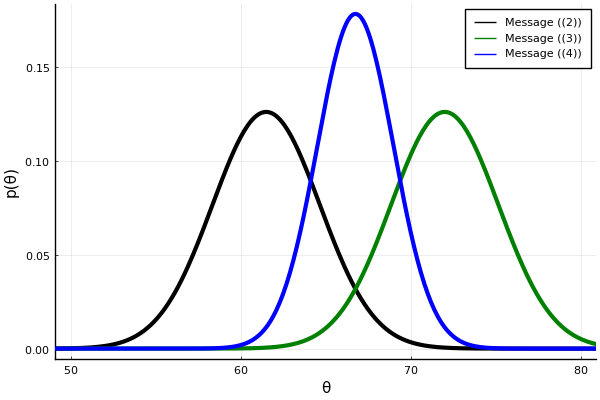

In [27]:
# Define probability density function for Gaussian distribution
pdf_Normal(Œ∏, m, v) = 1/sqrt(2*œÄ*v) * exp( -(Œ∏ - m)^2/(2*v))

# Extract parameters from message ((2))
m2 = messages[2].dist.params[:m]
v2 = messages[2].dist.params[:v]

# Extract parameters from message ((3))
m3 = messages[3].dist.params[:m]
v3 = messages[3].dist.params[:v]

# Extract parameters from message ((4))
m4 = mean(messages[4].dist)
v4 = var(messages[4].dist)

# Define new range for skill level Œ∏
Œ∏_range = range(0.0, step=0.1, stop=100.0)
plot(Œ∏_range, pdf_Normal.(Œ∏_range, m2, v2), color="black", linewidth=3, label="Message ((2))")
plot!(Œ∏_range, pdf_Normal.(Œ∏_range, m3, v3), color="green", linewidth=3, label="Message ((3))")
plot!(Œ∏_range, pdf_Normal.(Œ∏_range, m4, v4), color="blue", linewidth=3, label="Message ((4))", xlims=[50., 80.])
xlabel!("Œ∏")
ylabel!("p(Œ∏)")

Message ((4)) is really a weighted average of Messages ((2)) and ((3)).

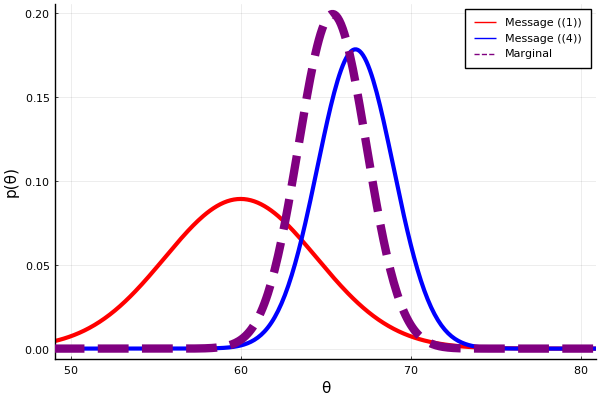

In [28]:
# Extract parameters from message ((1))
m1 = messages[1].dist.params[:m]
v1 = messages[1].dist.params[:v]

# Extract parameters from message ((4))
m4 = mean(messages[4].dist)
v4 = var(messages[4].dist)

# Extract parameters from marginal
m_marg = marginals[:Œ∏].params[:m]
v_marg = marginals[:Œ∏].params[:v]

# Define new range for skill level Œ∏
plot(Œ∏_range, pdf_Normal.(Œ∏_range, m1, v1), color="red", linewidth=3, label="Message ((1))")
plot!(Œ∏_range, pdf_Normal.(Œ∏_range, m4, v4), color="blue", linewidth=3, label="Message ((4))")
plot!(Œ∏_range, pdf_Normal.(Œ∏_range, m_marg, v_marg), color="purple", linewidth=6, linestyle=:dash, label="Marginal", xlims=[50., 80.])
xlabel!("Œ∏")
ylabel!("p(Œ∏)")


<span style="color:red">I would talk abotu the posterior rather than marginal. The parlance of marginal is usually used after marginalization of all teh other variables. Here we obtain a posterior.</span> The marginal is also a weighted average of two incoming messages. Notice that it is much closer to Message ((4)) than Message ((1)). That is because the variance of Message ((1)) (the prior) is much higher than that of Message ((4)) (the combination of likelihoods). The prior has a smaller weight in the weighted average.

---

### **Assignment**

**Play around with different values for the prior's variance and the variance of the likelihoods. What happens when you make the variance of $p(X_1 \mid \theta)$ different from that of $p(X_2 \mid \theta)$?** 

---